# SVM and SVM kernels

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)


y = np.hstack([y, -y])
x = np.hstack([x, -x])

In [4]:
x1 = np.linspace(-5, 5, 100)
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1, -y1])
x1 = np.hstack([x1, -x1])

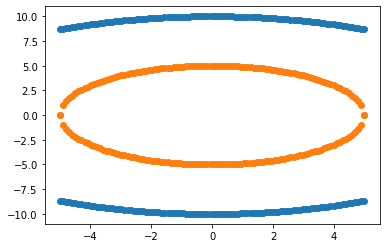

In [5]:
plt.scatter(x, y)
plt.scatter(x1, y1)

In [6]:
y3 = np.ones((1, 200))
y4 = np.ones((1, 200))
true_values = np.hstack([y3, np.zeros((1, 200))])
y4 = -y4
Y = np.hstack([y3, y4])
X1 = np.hstack([x, x1])
X2 = np.hstack([y, y1])
X1=np.expand_dims(X1,axis=1)
X2=np.expand_dims(X2,axis=1)
print(true_values)

[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
  1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [7]:
D = np.diagflat(Y)
A = np.append(X1, X2)
A = np.resize(A, (400, 2))
print(A.shape, X1.T.shape, X2.shape)

(400, 2) (1, 400) (400, 1)


In [8]:
B=np.concatenate([X1,X2], axis=1)

In [9]:
o=np.ones((400,1))
H=np.concatenate([B, -o], axis = 1)
print(H)

[[-5.          8.66025404 -1.        ]
 [-4.8989899   8.71779204 -1.        ]
 [-4.7979798   8.77378994 -1.        ]
 ...
 [-4.7979798  -1.40690791 -1.        ]
 [-4.8989899  -0.99994898 -1.        ]
 [-5.         -0.         -1.        ]]


In [10]:
print(D.shape, H.shape, A.shape)
E=np.matmul(D,C)
print(E)

(400, 400) (400, 3) (400, 2)


NameError: name 'C' is not defined

In [ ]:
v = 1
m = 400
error = 0
I = np.identity(m)
# print(I.shape, A.shape, H.shape)
temp = I+H.dot(H.T)
u = np.linalg.inv(temp).dot(o)
print(I.shape, A.shape, H.shape, u.shape)
w = A.T.dot(D).dot(u)
gamma = -o.T.dot(D).dot(u)
error = u/v
print(w[0], w[1], gamma)
print(w.shape, gamma.shape)

In [ ]:
a = w[0]
b = w[1]
margin = 2/(np.sqrt(gamma*gamma + a*a + b*b))
print(margin)
# print(val)

import matplotlib.pyplot as plt 
x0 = np.linspace(-5, 5, 400)
val = (gamma-a*x0)/b
print(np.average(val))
print(val.shape, x.shape)
plt.scatter(x, y)
plt.scatter(x1, y1)
plt.plot(x0, (val.T), '--')
# A.view()

In [11]:
output = A.dot(w)-gamma
output = output>0
print(output.shape, true_values.shape)
from sklearn.metrics import precision_score, accuracy_score

accuracy_score(true_values.T, output), precision_score(true_values.T, output)

NameError: name 'w' is not defined

In [409]:
K = np.arange(m*m)
K = K.reshape((m, m))
K = K.astype(float)
AT = A.T
for i in range(400):
    for j in range(400):
#         print(i, j, A[i:].shape, AT[:j].shape)
        diff = np.square(np.linalg.norm(A[i,:]-AT[:,j]))/2
#         print(i, j, diff)
        similarity = np.exp(diff/30)
#         print(diff, similarity)
        K[i][j] = similarity
#         print(K[i][j], diff, similarity)

print(K.shape)
K.view()

(400, 400)


array([[1.        , 1.00136133, 1.00545645, ..., 1.31612508, 1.46695012,
        1.9477506 ],
       [1.00136133, 1.        , 1.00136133, ..., 1.26794623, 1.40340803,
        1.83695512],
       [1.00545645, 1.00136133, 1.        , ..., 1.22485912, 1.3462763 ,
        1.73718222],
       ...,
       [1.31612508, 1.26794623, 1.22485912, ..., 1.        , 1.00907837,
        1.09222497],
       [1.46695012, 1.40340803, 1.3462763 , ..., 1.00907837, 1.        ,
        1.0423652 ],
       [1.9477506 , 1.83695512, 1.73718222, ..., 1.09222497, 1.0423652 ,
        1.        ]])

In [418]:
G = D.dot(np.concatenate((K, -o), axis=1))

# taking v (gamma one) as 1
v1 = (I/+G.dot(G.T))
v1 = np.linalg.inv(v1).dot(o)
u1 = D.dot(K.T).dot(D).dot(v1)
gamma1 = (-o.T).dot(D).dot(v1)

error1 = v1

In [412]:
output1 = K.dot(D).dot(u1)-gamma1

output1 = output1>0

print(output1.shape, D.shape, u1.shape, gamma1.shape, o.shape, v1.shape, G.shape)

accuracy_score(true_values.T, output1), precision_score(true_values.T, output1)

(400, 1) (400, 400) (400, 1) (1, 1) (400, 1) (400, 1) (400, 401)


(0.8, 0.7777777777777778)

In [109]:
df = pd.DataFrame(np.vstack([y, x]).T, columns = ['X1', 'X2'])
# df.head()
df['Y'] = 0
df2 = pd.DataFrame(np.vstack([y1, x1]).T, columns = ['X1', 'X2'])
df2['Y'] = 1
df2.head()

,X1,X2,Y
0,0.000000,-5.00000,1
1,0.999949,-4.89899,1
2,1.406908,-4.79798,1
3,1.714198,-4.69697,1
4,1.969049,-4.59596,1


In [110]:
df = df.append(df2)
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [111]:
## Independent and dependent feature

X = df.iloc[:, :2]
y = df.Y

In [99]:
X.head()

,X1,X2
0,8.660254,-5.00000
1,8.717792,-4.89899
2,8.773790,-4.79798
3,8.828277,-4.69697
4,8.881281,-4.59596


In [118]:
## Split the data set into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [119]:
from sklearn.svm import SVC
classifier = SVC(kernel = "linear")
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [120]:
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.45

C:\Users\anura\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:445: UserWarning:

X does not have valid feature names, but SVC was fitted with feature names



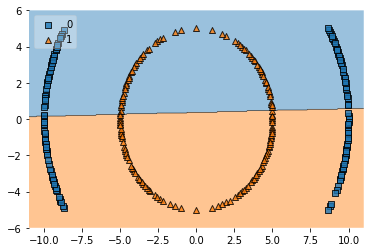

In [121]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train.to_numpy(), y_train.to_numpy(), clf=classifier, legend=2)
plt.show()

# Polynomial Kernel K(x, y) = (x.T y + c)^d

In [122]:
df['X1_Square'] = df['X1']**2
df['X2_Square'] = df['X2']**2
df['X1*X2'] = (df['X1'] * df['X2'])

df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [123]:
### Independent and dependent feature
X = df[['X1', 'X2', 'X1_Square', 'X2_Square', 'X1*X2']]
y = df['Y']

In [83]:
y

0      0
1      0
2      0
3      0
4      0
      ..
195    1
196    1
197    1
198    1
199    1
Name: Y, Length: 400, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
X_train

In [125]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2', color='Y')
fig.show()

In [126]:
fig = px.scatter_3d(df, x='X1_Square', y='X2_Square', z='X1*X2', color='Y')
fig.show()

In [117]:
X_train

,X1,X2
50,4.999745,0.050505
63,9.906589,1.363636
112,-3.263736,3.787879
159,-9.953852,-0.959596
83,3.680983,3.383838
...,...,...
123,-4.223140,2.676768
192,-9.031653,-4.292929
117,-9.445795,3.282828
47,9.996811,-0.252525


In [34]:
y_train

50     1
63     0
112    1
159    0
83     1
      ..
123    1
192    0
117    0
47     0
172    0
Name: Y, Length: 300, dtype: int64

In [142]:
classifier = SVC(kernel = "linear")
clf = classifier.fit(X_train[X_train.columns[2:4]], y_train)

In [145]:
y_pred = classifier.predict(X_test[X_test.columns[2:4]])
accuracy_score(y_test, y_pred)

1.0

In [2]:
plt.scatter(X_train.iloc[:, 4].values, X_train.iloc[:, 3].values, c = y_train, cmap='winter')
ax = plt.gca()
xlim = ax.get_xlim()
ax.scatter(X_test.iloc[:, 4].values, X_test.iloc[:, 3].values, c = y_test, cmap='winter', marker = 's')

NameError: name 'plt' is not defined

In [92]:
X_train.iloc[:, 0][y_train == 0]

63     9.906589
159   -9.953852
81     9.480297
153   -9.993749
96     8.828277
         ...   
195   -8.881281
192   -9.031653
117   -9.445795
47     9.996811
172   -9.738311
Name: X1, Length: 145, dtype: float64

IndexError: index 2 is out of bounds for axis 0 with size 2

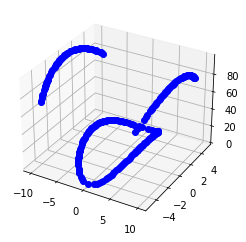

Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3312.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3312.0_x64__qbz5n2kfra8p0\lib\asyncio\selector_events.py", line 115, in _read_from_self
    data = self._ssock.recv(4096)
ConnectionResetError: [WinError 10054] An existing connection was forcibly closed by the remote host
Exception in callback BaseSelectorEventLoop._read_from_self()
handle: <Handle BaseSelectorEventLoop._read_from_self()>
Traceback (most recent call last):
  File "C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3312.0_x64__qbz5n2kfra8p0\lib\asyncio\events.py", line 80, in _run
    self._context.run(self._callback, *self._args)
  

In [147]:
# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X_train.iloc[:, 0][y_train == 1], X_train.iloc[:, 1][y_train == 1], X_train.iloc[:, 2][y_train == 1],'ob')
ax.plot3D(X_train.iloc[:, 0][y_train == 0], X_train.iloc[:, 1][y_train == 0], X_train.iloc[:, 2][y_train == 0],'ob')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

In [1]:
# The equation of the separating plane is given by all x so that np.dot(svc.coef_[0], x) + b = 0.
# Solve for w3 (z)
z = lambda x,y: (-clf.intercept_[0]-clf.coef_[0][0]*x -clf.coef_[0][1]*y) / clf.coef_[0][2]
tmp = np.linspace(-5,5,30)
x,y = np.meshgrid(tmp,tmp)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(X_train.iloc[:, 0][y_train == 1], X_train.iloc[:, 1][y_train == 1], X_train.iloc[:, 2][y_train == 1],'ob')
ax.plot3D(X_train.iloc[:, 0][y_train == 0], X_train.iloc[:, 1][y_train == 0], X_train.iloc[:, 2][y_train == 0],'ob')
ax.plot_surface(x, y, z(x,y))
ax.view_init(30, 60)
plt.show()

NameError: name 'np' is not defined

In [ ]:
1+2